In [22]:
# This block for imports only
import pandas as pd
import re # for regex functionality later
import matplotlib.pyplot as plt # Import for visuals
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Set display options to prevent wrapping columns
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.width', None)

# Set display format for floating-point numbers to dollar amounts
#pd.options.display.float_format = '${:,.2f}'.format



##### **Read data from csv, Show the head of the datafram**

In [23]:
# read the sales data into a dataframe
car_sales_data = pd.read_csv('data/car_sales_data.csv')

print(car_sales_data.head(10).to_string(max_colwidth=None))


         Date       Salesperson      Customer Name Car Make  Car Model  Car Year  Sale Price  Commission Rate  Commission Earned
0  2022-08-01   Monica Moore MD        Mary Butler   Nissan     Altima      2018       15983         0.070495            1126.73
1  2023-03-15      Roberto Rose     Richard Pierce   Nissan      F-150      2016       38474         0.134439            5172.40
2  2023-04-29      Ashley Ramos       Sandra Moore     Ford      Civic      2016       33340         0.114536            3818.63
3  2022-09-04    Patrick Harris       Johnny Scott     Ford     Altima      2013       41937         0.092191            3866.20
4  2022-06-16        Eric Lopez      Vanessa Jones    Honda  Silverado      2022       20256         0.113490            2298.85
5  2022-12-18  Terry Perkins MD         John Olsen     Ford     Altima      2015       14769         0.077247            1140.86
6  2022-06-12      Ashley Brown       Tyler Lawson    Honda      F-150      2013       41397     

##### Make/Model discrepency 
Noting the above make and model of cars does not match.  this will be resolved within code, I will default the make to the proper model of car.  Nissan did not make an F-150, therefore I will change the make to the proper manufacturer of the model of the vehicle.

##### **Show a list column names, drop unused columns, verify dropped column.**

In [24]:
# list the column names of the sales data
print(car_sales_data.columns.to_list())

# given the column names, the least usefull and unlikely to be used will be customer name.  This column can be dropped. inplace to modify existing dataframe
car_sales_data.drop(['Customer Name'], axis=1, inplace=True)

# verify column dropped
print(car_sales_data.columns.to_list())

['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model', 'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned']
['Date', 'Salesperson', 'Car Make', 'Car Model', 'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned']


##### **Show date range of sales, show if any null values in columns, show dtype of columns**

In [25]:
# date range of the sales data
print(f'latest-sale: {car_sales_data["Date"].max()}, oldest-sale: {car_sales_data.Date.min()}\n')

# check for null values per column
print(f'null values per column: \n{car_sales_data.isna().sum()}\n')

'''
given no null values this is unnecessary however as of the initial concept of this project, nan values would likely not 
  have any significant effect on the end totals being sought, therefore it is best if they were just dropped.
  import pandas as pd
# drop all null values in the original dataframe and effect the original dataframe
car_sales_data.dropna(inplace=True)
'''
print(car_sales_data.dtypes, '\n')

# print all unique makes and models
print(car_sales_data['Car Make'].unique(), car_sales_data['Car Model'].unique())



latest-sale: 2023-05-01, oldest-sale: 2022-05-01

null values per column: 
Date                 0
Salesperson          0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

Date                  object
Salesperson           object
Car Make              object
Car Model             object
Car Year               int64
Sale Price             int64
Commission Rate      float64
Commission Earned    float64
dtype: object 

['Nissan' 'Ford' 'Honda' 'Toyota' 'Chevrolet'] ['Altima' 'F-150' 'Civic' 'Silverado' 'Corolla']


##### **Inspect data within the dataframe**
* Set car Sales Price to a float

In [26]:
# set sale price from int64 to float
car_sales_data['Sale Price'] = car_sales_data['Sale Price'].astype(float)

# seperate descriptions of the types of data within the table for viewing, objects on top, numbers on bottom
print(f"{car_sales_data.describe(include=['O'])}\n\n{car_sales_data.describe(include=['int64', 'float64'])}")

              Date    Salesperson Car Make  Car Model
count      2500000        2500000  2500000    2500000
unique         366         518657        5          5
top     2022-12-24  Michael Smith    Honda  Silverado
freq          7144           1229   500687     500842

           Car Year    Sale Price  Commission Rate  Commission Earned
count  2.500000e+06  2.500000e+06     2.500000e+06       2.500000e+06
mean   2.015996e+03  3.001218e+04     9.998766e-02       3.001005e+03
std    3.739132e+00  1.154514e+04     2.887202e-02       1.481467e+03
min    2.010000e+03  1.000000e+04     5.000014e-02       5.013400e+02
25%    2.013000e+03  2.001900e+04     7.496450e-02       1.821710e+03
50%    2.016000e+03  3.000600e+04     1.000058e-01       2.741910e+03
75%    2.019000e+03  4.002200e+04     1.250065e-01       3.978142e+03
max    2.022000e+03  5.000000e+04     1.500000e-01       7.494530e+03


##### **Set date format for dataframe**

In [27]:
# Show date time before modification
print(car_sales_data.Date.head(2),'\n')

# set date format for Date column in dataframe, .dt.strftime to set year to 2 digit
car_sales_data['Date'] = pd.to_datetime(car_sales_data['Date'], format='%Y-%m-%d').dt.strftime('%y-%m-%d')

# Convert car year to date
car_sales_data['Car Year'] = pd.to_datetime(car_sales_data['Car Year'], format='%Y')

# Extract the year 
car_sales_data['Car Year'] = car_sales_data['Car Year'].dt.year

# Show date time after conversion
print(car_sales_data.Date.head(2), '\n')
print(car_sales_data['Car Year'].head(2))


0    2022-08-01
1    2023-03-15
Name: Date, dtype: object 

0    22-08-01
1    23-03-15
Name: Date, dtype: object 

0    2018
1    2016
Name: Car Year, dtype: int32


##### Correct Make/Model descrepancy

In [28]:
'''
Full list of make and models included in df
['Nissan' 'Ford' 'Honda' 'Toyota' 'Chevrolet'] ['Altima' 'F-150' 'Civic' 'Silverado' 'Corolla']

This function is to corret the make/models errors within the dataframe, 
It is assumed the model will be correct and the make will be adjusted based on the model.
'''
# Function to correct car make based on car model 
def correct_make(row): 
    if row['Car Model'] == 'Altima': 
        return 'Nissan' 
    elif row['Car Model'] == 'F-150': 
        return 'Ford' 
    elif row['Car Model'] == 'Civic': 
        return 'Honda' 
    elif row['Car Model'] == 'Silverado': 
        return 'Chevrolet' 
    elif row['Car Model'] == 'Corolla': 
        return 'Toyota' 
    else: 
        return row['Car Make'] 
    
# Apply the Make Model corrections to the DataFrame 
car_sales_data['Car Make'] = car_sales_data.apply(correct_make, axis=1)

# Show make/model descrepency solved.
print(car_sales_data.head(10).to_string(max_colwidth=None))


       Date       Salesperson   Car Make  Car Model  Car Year  Sale Price  Commission Rate  Commission Earned
0  22-08-01   Monica Moore MD     Nissan     Altima      2018     15983.0         0.070495            1126.73
1  23-03-15      Roberto Rose       Ford      F-150      2016     38474.0         0.134439            5172.40
2  23-04-29      Ashley Ramos      Honda      Civic      2016     33340.0         0.114536            3818.63
3  22-09-04    Patrick Harris     Nissan     Altima      2013     41937.0         0.092191            3866.20
4  22-06-16        Eric Lopez  Chevrolet  Silverado      2022     20256.0         0.113490            2298.85
5  22-12-18  Terry Perkins MD     Nissan     Altima      2015     14769.0         0.077247            1140.86
6  22-06-12      Ashley Brown       Ford      F-150      2013     41397.0         0.142780            5910.67
7  22-06-20     Norma Watkins     Nissan     Altima      2015     46233.0         0.071624            3311.38
8  22-09-0

##### **For feature Engineering, create a season column based on specific dates.  this can be usefull info for determining which cars sell best during spring, summer, fall, winter.**
<ul>
<li>Spring - March, April, and May</li>
<li>Summer - June, July, August</li>
<li>Fall - September, October, November</li>
<li>Winter -  December, January, February</li>
</ul>

In [29]:

# Function to assign seasons based on the date
def assign_season(date_str):
    if re.search(r'-03-|-04-|-05-', date_str): # r = raw string, | = regex or, date_str is date passed in
        return 'Spring'
    elif re.search(r'-06-|-07-|-08-', date_str):
        return 'Summer'
    elif re.search(r'-09-|-10-|-11-', date_str):
        return 'Fall'
    else:
        return 'Winter'

# Create the Seasons column and Apply the function to the 'Date' column to determine the season for each sale.
car_sales_data['Season'] = car_sales_data['Date'].apply(assign_season)

# Display the DataFrame with the new 'Season' column
print(car_sales_data.head().to_string(max_colwidth=None))


       Date      Salesperson   Car Make  Car Model  Car Year  Sale Price  Commission Rate  Commission Earned  Season
0  22-08-01  Monica Moore MD     Nissan     Altima      2018     15983.0         0.070495            1126.73  Summer
1  23-03-15     Roberto Rose       Ford      F-150      2016     38474.0         0.134439            5172.40  Spring
2  23-04-29     Ashley Ramos      Honda      Civic      2016     33340.0         0.114536            3818.63  Spring
3  22-09-04   Patrick Harris     Nissan     Altima      2013     41937.0         0.092191            3866.20    Fall
4  22-06-16       Eric Lopez  Chevrolet  Silverado      2022     20256.0         0.113490            2298.85  Summer


##### **Data Final Exploratory Data Analysis (EDA)** 

In [30]:
# seperate descriptions of the types of data within the table for viewing, objects on top, numbers on bottom
print(f"{car_sales_data.describe(include=['O']).to_string(max_colwidth=None)}\n\n{car_sales_data.describe(include=['int64', 'float64']).to_string(max_colwidth=None)}")


            Date    Salesperson   Car Make  Car Model   Season
count    2500000        2500000    2500000    2500000  2500000
unique       366         518657          5          5        4
top     22-12-24  Michael Smith  Chevrolet  Silverado   Spring
freq        7144           1229     500842     500842   634282

         Sale Price  Commission Rate  Commission Earned
count  2.500000e+06     2.500000e+06       2.500000e+06
mean   3.001218e+04     9.998766e-02       3.001005e+03
std    1.154514e+04     2.887202e-02       1.481467e+03
min    1.000000e+04     5.000014e-02       5.013400e+02
25%    2.001900e+04     7.496450e-02       1.821710e+03
50%    3.000600e+04     1.000058e-01       2.741910e+03
75%    4.002200e+04     1.250065e-01       3.978142e+03
max    5.000000e+04     1.500000e-01       7.494530e+03


In [31]:
# Calculate total sales and commission for each salesperson 
#sales_summary = car_sales_data.groupby('Salesperson').agg({'Sales': 'sum', 'Commission Earned': 'sum'}).reset_index()
sales_ranking = car_sales_data.groupby('Salesperson').agg({
    'Salesperson': 'count',
    'Sale Price': 'sum',
    'Commission Earned': 'sum'
}).rename(columns={'Salesperson': 'Number Sales', 'Sale Price': 'Total Sales', 'Commission Earned': 'Total Commission'})

# Order by # sales, Sale Price and Commission Earned 
sales_ranking = sales_ranking.sort_values(by=['Number Sales', 'Total Sales', 'Total Commission'], ascending=False)

# Show the people with the top 10 sales for the year of 2022 - 2023
print(sales_ranking.head(5))

                 Number Sales  Total Sales  Total Commission
Salesperson                                                 
Michael Smith            1229   36806401.0        3658467.56
Michael Johnson           976   29012949.0        2883629.29
David Smith               821   24208781.0        2456566.33
James Smith               796   23905299.0        2448405.59
Jennifer Smith            753   22384383.0        2233631.21


<Axes: ylabel='Salesperson'>

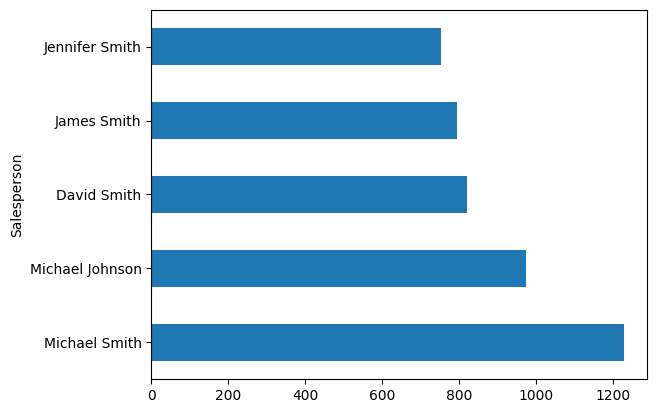

In [32]:
# View the top 10 sales reps numbers and compare them
# most number of sales, bar chart, side ways 'h'
sales_ranking['Number Sales'].head(5).plot(kind='barh')


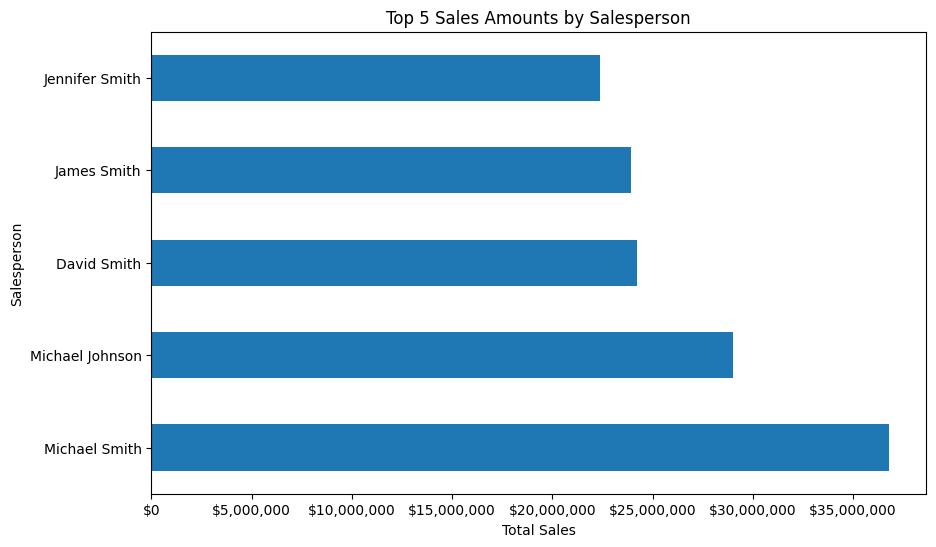

In [33]:
# define function to format labels as dollar amounts
def dollar_format(x, pos): 
    return f'${x:,.0f}'

# Create a bar chart, Creates a figure and set of axes with specific size in inches. 
fig, ax = plt.subplots(figsize=(10, 6)) 
sales_ranking['Total Sales'].head(5).plot(kind='barh', ax=ax)

# Set the formatter for the x-axis this formats the total sales into dollar format
ax.xaxis.set_major_formatter(FuncFormatter(dollar_format))

# Set X,Y labels and title 
ax.set_xlabel('Total Sales') 
ax.set_ylabel('Salesperson') 
ax.set_title('Top 5 Sales Amounts by Salesperson')

# After creating chart and formatting show it.
plt.show()

In [34]:

# group sales by Salesperson, season in order to extract salesperson seasonal sales data
# Rename columns for legability
seasonal_top_salesperson = car_sales_data.groupby(['Salesperson', 'Season']).agg({
    'Salesperson': 'count',
    'Sale Price': 'sum',
    'Commission Earned': 'sum',
}).rename(columns={'Salesperson': 'Number Sales', 'Car Make': 'Make Num', 'Sale Price': 'Total Sales', 'Commission Earned': 'Total Commission'}).reset_index()

print(seasonal_top_salesperson.head(5))

     Salesperson  Season  Number Sales  Total Sales  Total Commission
0   Aaron Abbott    Fall             1      40530.0           3396.01
1  Aaron Acevedo  Spring             1      20771.0           1611.52
2  Aaron Acevedo  Summer             2      64684.0           8073.47
3  Aaron Acevedo  Winter             3      97037.0           8633.73
4   Aaron Acosta    Fall             1      28076.0           3771.29


In [35]:
# Filter for seasonal sales people 

spring_sales = seasonal_top_salesperson[seasonal_top_salesperson['Season'] == 'Spring']
summer_sales = seasonal_top_salesperson[seasonal_top_salesperson['Season'] == 'Summer']
fall_sales = seasonal_top_salesperson[seasonal_top_salesperson['Season'] == 'Fall']
winter_sales = seasonal_top_salesperson[seasonal_top_salesperson['Season'] == 'Winter']

print(spring_sales.sort_values(by=['Total Sales', 'Number Sales'], ascending=[False, False]).head(5), '\n')
print(summer_sales.sort_values(by=['Total Sales', 'Number Sales'], ascending=[False, False]).head(5), '\n')
print(fall_sales.sort_values(by=['Total Sales', 'Number Sales'], ascending=[False, False]).head(5), '\n')
print(winter_sales.sort_values(by=['Total Sales', 'Number Sales'], ascending=[False, False]).head(5), '\n')

            Salesperson  Season  Number Sales  Total Sales  Total Commission
683831    Michael Smith  Spring           318    9484498.0         925645.09
681877  Michael Johnson  Spring           254    7621293.0         754168.98
252267      David Smith  Spring           218    6583567.0         676039.16
821648     Robert Smith  Spring           193    6045094.0         640901.83
413149      James Smith  Spring           196    6028372.0         612560.49 

             Salesperson  Season  Number Sales  Total Sales  Total Commission
683832     Michael Smith  Summer           305    9194949.0         941831.71
681878   Michael Johnson  Summer           255    7810932.0         772625.96
684452  Michael Williams  Summer           206    6281809.0         614203.15
252268       David Smith  Summer           213    5976883.0         597972.56
478007        John Smith  Summer           196    5800266.0         581970.81 

            Salesperson Season  Number Sales  Total Sales  Total C

            Salesperson  Season  Number Sales  Total Sales  Total Commission
683831    Michael Smith  Spring           318    9484498.0         925645.09
681877  Michael Johnson  Spring           254    7621293.0         754168.98
252267      David Smith  Spring           218    6583567.0         676039.16
821648     Robert Smith  Spring           193    6045094.0         640901.83
413149      James Smith  Spring           196    6028372.0         612560.49


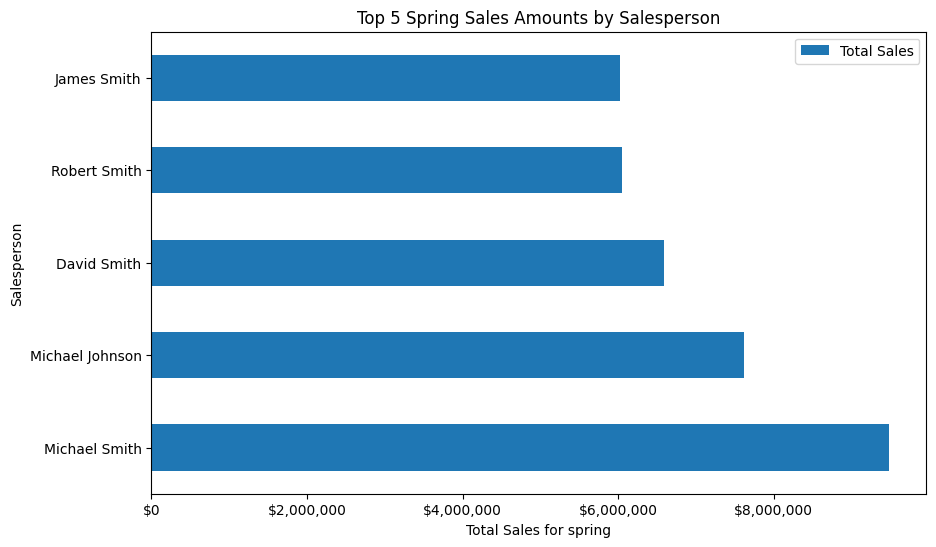

In [36]:
# Order by 'Total Sales' and 'Number Sales' 
spring_sales_sorted = spring_sales.sort_values(by=['Total Sales', 'Number Sales'], ascending=[False, False]).head(5)

print(spring_sales_sorted)

# Create a bar chart, Creates a figure and set of axes with specific size in inches. 
fig, ax = plt.subplots(figsize=(10, 6)) 
spring_sales_sorted.plot(kind='barh', x='Salesperson', y='Total Sales', ax=ax)

#plt.show()

# Set the formatter for the x-axis this formats the total sales into dollar format
ax.xaxis.set_major_formatter(FuncFormatter(dollar_format))

ax.set_xlabel('Total Sales for spring') 
ax.set_ylabel('Salesperson') 
ax.set_title('Top 5 Spring Sales Amounts by Salesperson')

plt.show()

In [37]:
# group sales by season, model in order to extract what type of car sold better per season
# Rename columns for legability
car_sales_per_season = car_sales_data.groupby(['Season', 'Car Make']).agg({
    'Car Make': 'count',
    'Sale Price': 'sum'
}).rename(columns={'Car Make': 'Number Sold', 'Sale Price': 'Total Sales',}).reset_index()

#print(car_sales_per_season)

spring_models = car_sales_per_season[car_sales_per_season['Season'] == 'Spring'].sort_values(by=['Number Sold'], ascending=[False]).head(5)
summer_models = car_sales_per_season[car_sales_per_season['Season'] == 'Summer'].sort_values(by=['Number Sold'], ascending=[False]).head(5)
fall_models = car_sales_per_season[car_sales_per_season['Season'] == 'Fall'].sort_values(by=['Number Sold'], ascending=[False]).head(5)
winter_models = car_sales_per_season[car_sales_per_season['Season'] == 'Winter'].sort_values(by=['Number Sold'], ascending=[False]).head(5)

print(spring_models, '\n')
print(summer_models, '\n')
print(fall_models, '\n')
print(winter_models, '\n')


   Season   Car Make  Number Sold   Total Sales
7  Spring      Honda       127320  3.819146e+09
5  Spring  Chevrolet       127315  3.823719e+09
9  Spring     Toyota       126902  3.813257e+09
8  Spring     Nissan       126438  3.793500e+09
6  Spring       Ford       126307  3.786643e+09 

    Season   Car Make  Number Sold   Total Sales
11  Summer       Ford       126035  3.781986e+09
14  Summer     Toyota       125725  3.774885e+09
13  Summer     Nissan       125659  3.773061e+09
10  Summer  Chevrolet       125642  3.773565e+09
12  Summer      Honda       125234  3.761601e+09 

  Season   Car Make  Number Sold   Total Sales
0   Fall  Chevrolet       124596  3.738725e+09
1   Fall       Ford       124347  3.726685e+09
4   Fall     Toyota       124342  3.730674e+09
2   Fall      Honda       124314  3.722895e+09
3   Fall     Nissan       124087  3.728216e+09 

    Season   Car Make  Number Sold   Total Sales
17  Winter      Honda       123630  3.705962e+09
15  Winter  Chevrolet       1232

Spring
    Car Make  Number Sold   Total Sales
0      Honda       127320  3.819146e+09
1  Chevrolet       127315  3.823719e+09
2     Toyota       126902  3.813257e+09
3     Nissan       126438  3.793500e+09
4       Ford       126307  3.786643e+09


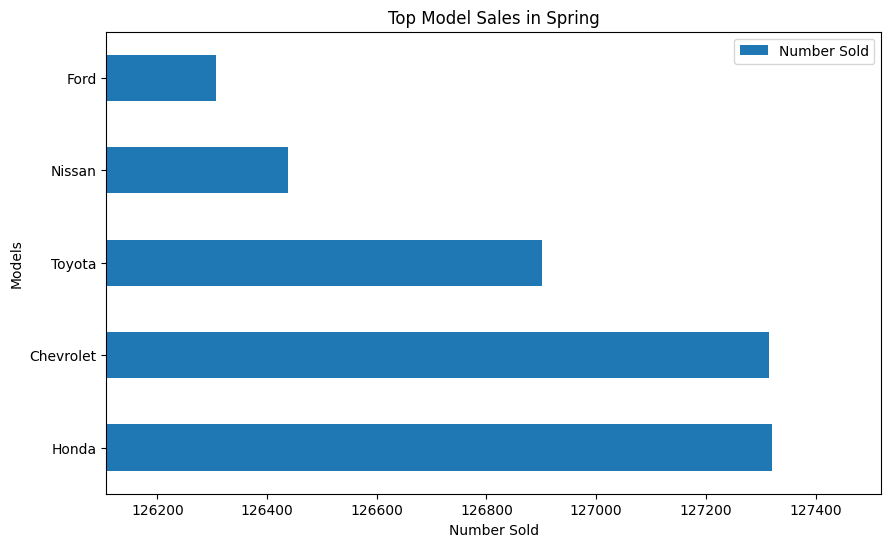

In [38]:
season = spring_models.reset_index() # edit the season 'spring'_models
heading_season = season['Season'][1] # format chart heading season
season.drop(axis=0, columns=['index', 'Season'], inplace=True) # drop unnecessary columns

print(heading_season)

# Create a bar chart, Creates a figure and set of axes with specific size in inches. 
fig, ax = plt.subplots(figsize=(10, 6)) 
season.plot(kind='barh', x='Car Make', y='Number Sold', ax=ax)

print(season)

# Set the range for the y-axis 
ax.set_xlim(season['Number Sold'][4]-200, season['Number Sold'][0]+200) # set chart limits, add starting space to limit so a bar appears, ending not to hit end

ax.set_xlabel('Number Sold') # x axis label
ax.set_ylabel('Models') # Y axis label
ax.set_title(f'Top Model Sales in {heading_season}') # Chart Heading

plt.show()

Winter
    Car Make  Number Sold   Total Sales
0      Honda       123630  3.705962e+09
1  Chevrolet       123289  3.704367e+09
2     Toyota       123193  3.697957e+09
3       Ford       122990  3.692818e+09
4     Nissan       122635  3.680785e+09


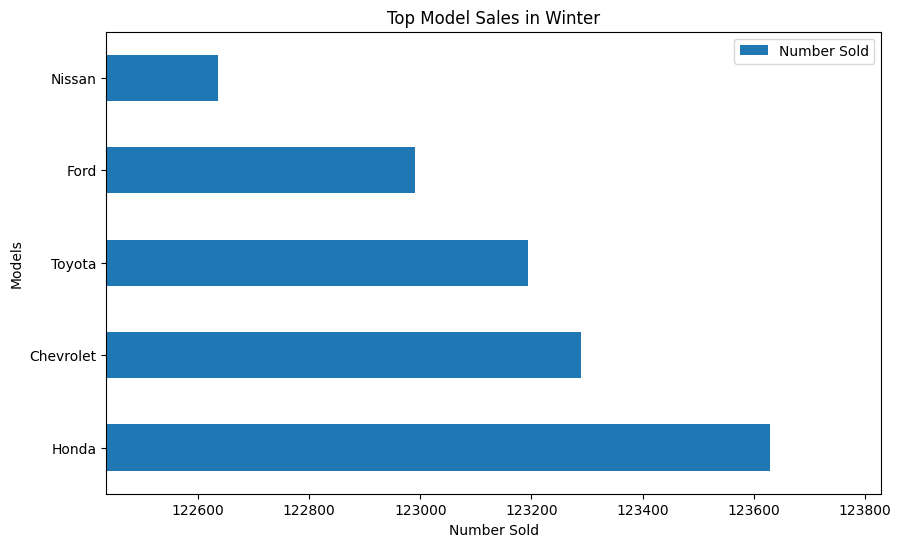

In [39]:
season = winter_models.reset_index() # edit the season 'spring'_models
heading_season = season['Season'][1] # format chart heading season
season.drop(axis=0, columns=['index', 'Season'], inplace=True) # drop unnecessary columns

print(heading_season)

# Create a bar chart, Creates a figure and set of axes with specific size in inches. 
fig, ax = plt.subplots(figsize=(10, 6)) 
season.plot(kind='barh', x='Car Make', y='Number Sold', ax=ax)

print(season)
#print(car_sales_per_season.sort_values(by=['Number Sold'], ascending=[False, False])).head(5)

#plt.show()

# Set the formatter for the x-axis this formats the total sales into dollar format
#ax.xaxis.set_major_formatter(FuncFormatter(dollar_format))

# Set the range for the y-axis 
ax.set_xlim(season['Number Sold'][4]-200, season['Number Sold'][0]+200) # set chart limits, add starting space to limit so a bar appears, ending not to hit end

ax.set_xlabel('Number Sold') 
ax.set_ylabel('Models') 
ax.set_title(f'Top Model Sales in {heading_season}')

plt.show()

* **Advanced EDA**: Use pair plots or correlation matrices to explore relationships.

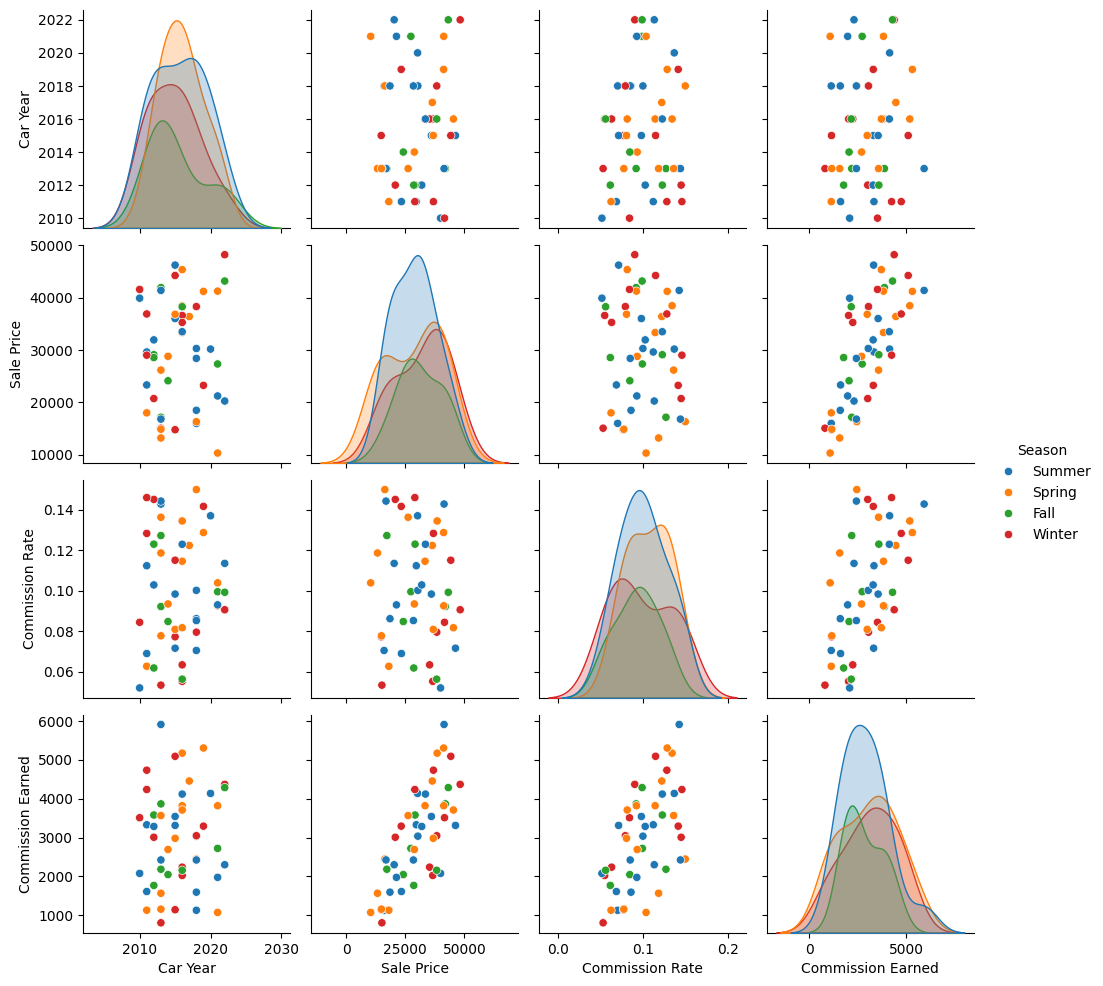

In [40]:
sns.pairplot(car_sales_data.head(50), hue='Season')
plt.show()